# Lending club case study

### Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

### Objective: 

Identify the driving factors behind loan defaults using Exploratory Data Analysis (EDA).

### Outcome:

 Reduce credit loss by identifying risky loan applicants.

### Steps of analysis:


1. Data Understanding
2. Data Wrangling
3. Data Visualization and Analysis
4. Conclusion

### Loading Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [5]:
#loading data and checking top 5 rows
loan_data=pd.read_csv('loan.csv')
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

### Checking dataset information

In [6]:
loan_data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

In [7]:
loan_data.shape

(39717, 111)

There are 39717 rows and 111 columns in the given loan dataset

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [10]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Checking for null values across columns

In [11]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Droping Nan values if more than 50% nan found in columns

In [12]:
threshold = len(loan_data) * 0.5
loan_data = loan_data.dropna(axis=1, thresh=threshold)

In [13]:
loan_data.shape

(39717, 54)

In [14]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Removing the irrelevant columns

Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis

The columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis


In [15]:
loan_data=loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)

Removing desc,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions

In [16]:
loan_data=loan_data.drop(['title','emp_title','desc','url'],axis=1)

Removing zip_code as it is a masked data and cannot be used as input for the analysis

In [17]:
loan_data=loan_data.drop(['zip_code'],axis=1)

Removing member_id as it is a duplicate index column and is not required for the analysis

In [18]:
loan_data=loan_data.drop(['member_id'],axis=1)

Removing funded_amnt_inv as it is a internal data and is calculated after loan approval thus cannot be used as input for the analysis

In [19]:
loan_data=loan_data.drop(['funded_amnt_inv'],axis=1)

In [20]:
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 26)


In [21]:
loan_data.head()

id  loan_amnt  funded_amnt        term int_rate  installment grade  \
0  1077501       5000         5000   36 months   10.65%       162.87     B   
1  1077430       2500         2500   60 months   15.27%        59.83     C   
2  1077175       2400         2400   36 months   15.96%        84.33     C   
3  1076863      10000        10000   36 months   13.49%       339.31     C   
4  1075358       3000         3000   60 months   12.69%        67.79     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0            Verified  Dec-11   
1        C4   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2        C5  10+ years           RENT     12252.0        Not Verified  Dec-11   
3        C1  10+ years           RENT     49200.0     Source Verified  Dec-11   
4        B5     1 year           RENT     80000.0     Source Verified  Dec-11   

   loan_status pymnt_plan         purpose addr_state    dti  \
0   Fully Paid          n     credit_card         AZ  27.65   
1  Charged Off          n             car         GA   1.00   
2   Fully Paid          n  small_business         IL   8.72   
3   Fully Paid          n           other         CA  20.00   
4      Current          n           other         OR  17.94   

  initial_list_status  collections_12_mths_ex_med  policy_code  \
0                   f                         0.0            1   
1                   f                         0.0            1   
2                   f                         0.0            1   
3                   f                         0.0            1   
4                   f                         0.0            1   

   acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0               0                       0.0            0   
1               0                       0.0            0   
2               0                       0.0            0   
3               0                       0.0            0   
4               0                       0.0            0   

   pub_rec_bankruptcies  tax_liens  
0                   0.0        0.0  
1                   0.0        0.0  
2                   0.0        0.0  
3                   0.0        0.0  
4                   0.0        0.0

### Checking Unique values as it is most important for visualisation aspect

In [22]:
# Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
loan_data.nunique().sort_values(ascending=True)

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64

In [23]:
# Removing irrelevant columns which contain 1 unique value
loan_data = loan_data.loc[:,loan_data.nunique()>1]

In [24]:
# Shape of the dataframe after removing columns
loan_data.shape

(39717, 18)

In [25]:
# Remaining columns in the dataframe
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

As we are done removing the irrelevant columns, we can move ahead with the analysis and check for null values which can be removed or fixed depending on the relevance of the column to objective of the analysis.

In [26]:
# Checking for missing values across the dataframe
loan_data.isnull().sum().sort_values(ascending=False)

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64

The above columns has null values which can be removed or fixed depending on the relevance of the column to objective of the analysis.

In [27]:
# Checking values in emp_length columns for feasibility of inserting null values
loan_data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [28]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
loan_data.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


As for column 'emp_length', we can remove the null values as fixing null values are not feasible and will lead to loss of information.


As for the column 'pub_rec_bankruptcies', the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.

In [29]:
# Removing null values in emp_title and emp_length columns
loan_data = loan_data.dropna(subset=['emp_length'])

In [30]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)

In [31]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


We are done with fixing and removing null values to improve the accuracy of the analysis

In [32]:
# Shape of the dataframe
print(loan_data.shape)

(38642, 18)


### Removing duplicate rows from the dataframe

In [33]:
# Removing duplicate rows in the dataframe
loan_data = loan_data.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(loan_data.shape)

(38642, 18)


No duplicate rows found in the dataframe

### Correcting Data Types and Deriving New Columns

In [34]:
loan_data['term'] = loan_data['term'].str.replace(' months', '').astype(int)
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '').astype(float).round(2)
loan_data['emp_length'] = loan_data['emp_length'].str.replace('years', '').str.replace('+', '').str.replace('< 1', '0.5').str.replace('year', '').astype(float)
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.month
    
category_cols = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state']
loan_data[category_cols] = loan_data[category_cols].astype('category')

In [35]:
# Round all float64 columns to 2 decimal places
loan_data[loan_data.select_dtypes(include=['float64']).columns] = loan_data.select_dtypes(include=['float64']).round(2)


In [36]:
loan_data.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501       5000         5000    36     10.65       162.87     B   
1  1077430       2500         2500    60     15.27        59.83     C   
2  1077175       2400         2400    36     15.96        84.33     C   
3  1076863      10000        10000    36     13.49       339.31     C   
4  1075358       3000         3000    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2        10.0           RENT     24000.0            Verified   
1        C4         0.5           RENT     30000.0     Source Verified   
2        C5        10.0           RENT     12252.0        Not Verified   
3        C1        10.0           RENT     49200.0     Source Verified   
4        B5         1.0           RENT     80000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65   
1 2011-12-01  Charged Off             car         GA   1.00   
2 2011-12-01   Fully Paid  small_business         IL   8.72   
3 2011-12-01   Fully Paid           other         CA  20.00   
4 2011-12-01      Current           other         OR  17.94   

   pub_rec_bankruptcies  issue_year  issue_month  
0                   0.0        2011           12  
1                   0.0        2011           12  
2                   0.0        2011           12  
3                   0.0        2011           12  
4                   0.0        2011           12

As we can only perform analysis on the Completed loan or Defaulted loans data thus filtering the completed and defaulted loan entries

In [37]:
# Removing loans with status as 'Current'
loan_data = loan_data[loan_data.loan_status!='Current']
print(loan_data.shape)

(37544, 20)


As the data has been cleaned, fixed and filtered as per requirement, we can select columns required for analysis and move ahead with the analysis.

In [38]:
# selecting columns based on domain knowledge
## Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
loan_data = loan_data[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Shape of the dataframe after removing columns
loan_data.shape

(37544, 17)

In [39]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

### Removing the outliers

Checking outlier values in continuous columns via box plot

The continuous columns are loan_amnt, int_rate, annual_inc, dti whereas the categorical columns are term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, addr_state, issue_month, issue_year, pub_rec_bankruptcies

We will check outlier using box plot and then remove the outliers as per requirement


In [42]:
## with loan_amnt
import plotly.express as px

fig = px.box(loan_data, x='loan_amnt', title='Distribution of Loan Amount', labels={'loan_amnt':'Loan Amount'})
fig.show()


Upper fence turns out to be 29.175k =29175 whereas max is 35k=35000 which is not much more then upper fence thus will not have much impact on the analysis.

In [46]:
## with int_rate

fig1 = px.box(loan_data, x='int_rate', title='Distribution of Interest Rate', labels={'int_rate':'Interest Rate'})
fig1.show()

Upper fence turns out to be 22.64 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.

In [48]:
## with annual_inc

fig2= px.box(loan_data,x='annual_inc', title='Distribution of Annual Income of the Burrower',labels={'annual_inc':'Annual Income'})
fig2.show()

Upper fence turns out to be 146k whereas max is 6000k which is much from upper fence thus we will remove the outliers in column annual_inc.

In [49]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()



As it can be observed from the line chart, the annual_inc is increasing in expontntial format around 99th percentile. Thus we can remove values greater than 99th percentile.

In [50]:
## Removing outliers in annual_inc greater than 99th percentile
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]

In [51]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

As the trend is more compatible with the analysis, we can proceed with analysis of other columns.



In [53]:
## with dti

px.box(loan_data,x='dti',width=750,height=350,title='Distribution of Debt To Income Ratio',labels={'dti':'DTI ratio'}).show()
## There are no outliers in dti hence we can move ahead with analysis.

### Univariate Analysis

Fully Paid     85.580932
Charged Off    14.419068
Name: loan_status, dtype: float64


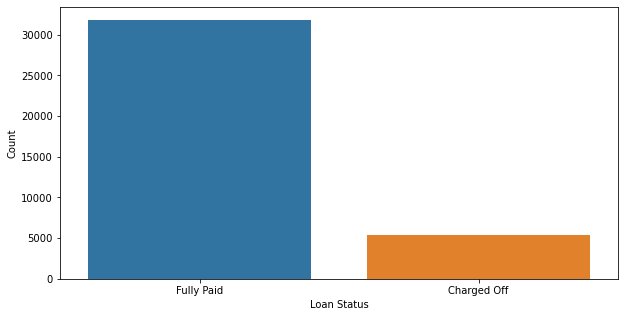

In [56]:
# Loan status 
print(loan_data.loan_status.value_counts(normalize=True) * 100)


# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan_data.loan_status)
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

Defaulted loan are low in numbers compared to Fully Paid.

In [59]:
#Loan_Amount
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

The loan amount varies from 500 to 35000 with a mean of 9800.

In [64]:
#Term of loan

print(loan_data.term.value_counts(normalize=True)*100)
      
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan_data.term)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

36    75.37729
60    24.62271
Name: term, dtype: float64


More than half of the loan taken has term of 36 months compared to 60 months.

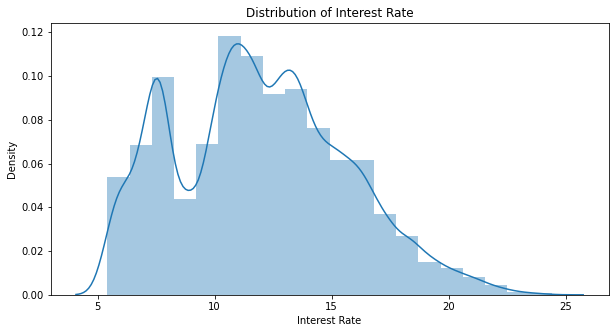

In [65]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan_data.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()


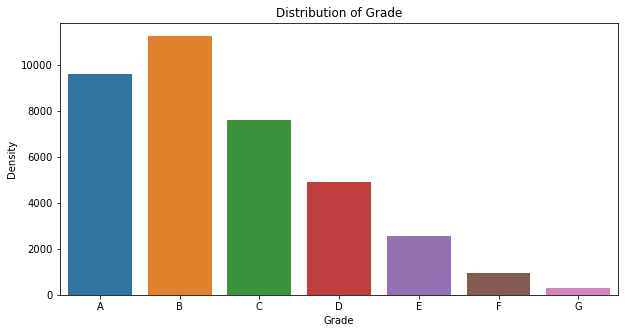

In [66]:
# Distribution of Greade
plt.figure(figsize=(10,5))
sns.countplot(loan_data.grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

A large amount of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

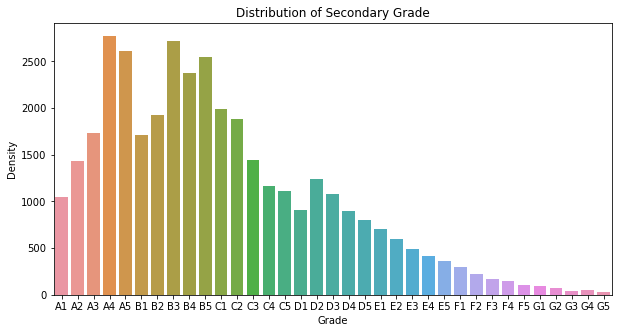

In [67]:
# Distribution of Grade
plt.figure(figsize=(10,5))
sns.countplot(loan_data.sub_grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

 A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This matches with the Grade distribution.

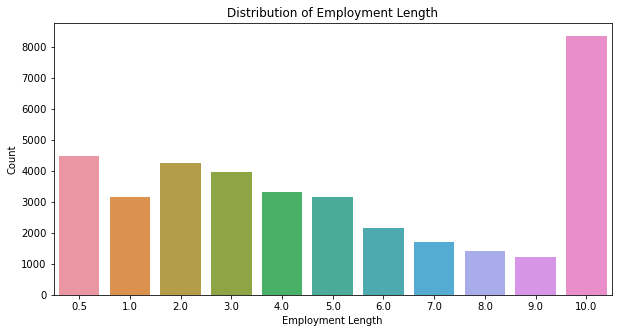

In [68]:
# Distribution of emp_length
plt.figure(figsize=(10,5))
sns.countplot(loan_data.emp_length)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)
plt.show()

Majority of borrowsers have working experience greater than 10 years.

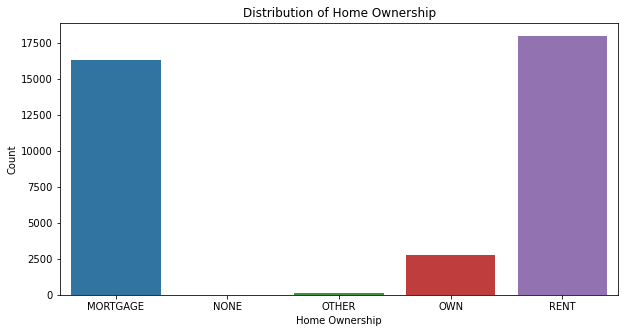

In [70]:
# Distribution of home_ownership
plt.figure(figsize=(10,5))
sns.countplot(loan_data.home_ownership)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

Majority of borrowsers don't posses property and are on mortage or rent.

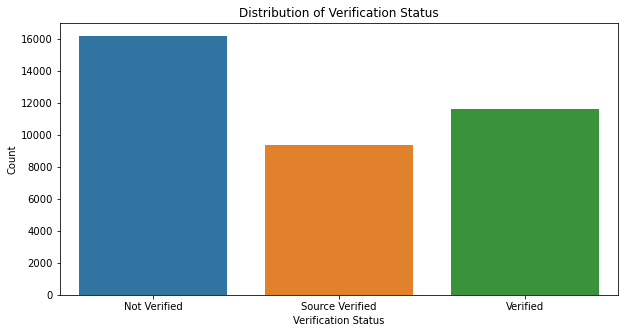

In [71]:
# Distribution of verification_status
plt.figure(figsize=(10,5))
sns.countplot(loan_data.verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()


About 50% of the borrowers are verified by the company or have source verified.

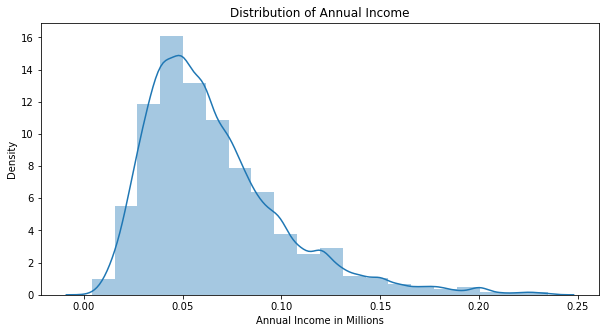

In [72]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(loan_data.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

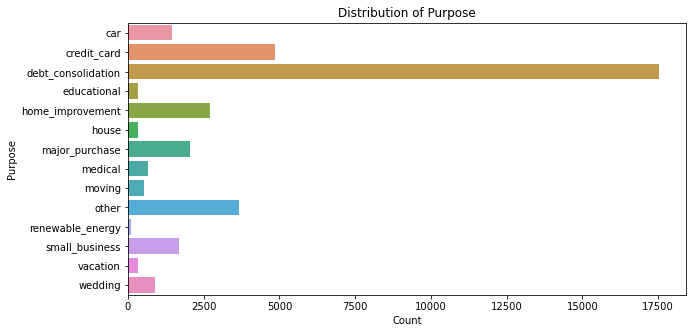

In [73]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=loan_data.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

A large percentage of loans are taken for debt consolidation followed by credit card.

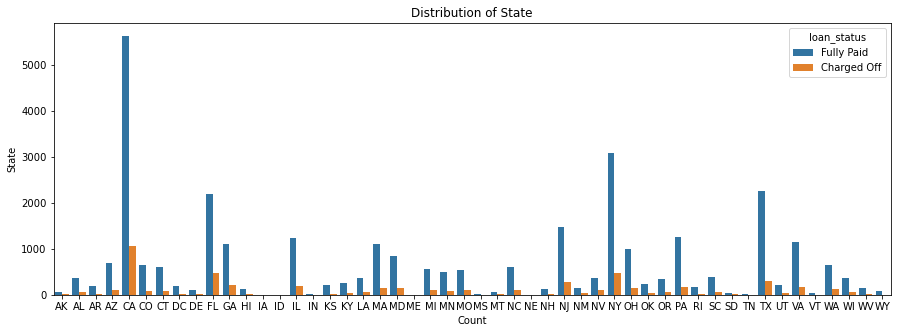

In [74]:
# Distribution of addr_state
plt.figure(figsize=(15,5))
sns.countplot(loan_data.addr_state,hue=loan_data.loan_status)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of State',fontsize=12)
plt.show()

 Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

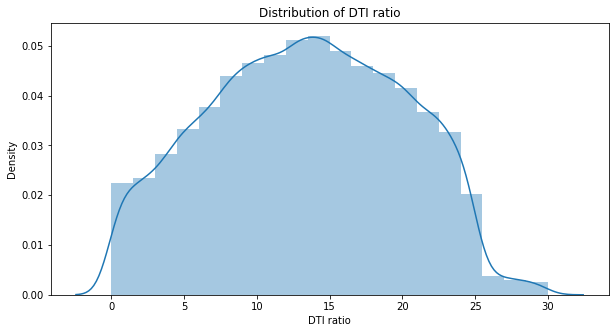

In [75]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(loan_data.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

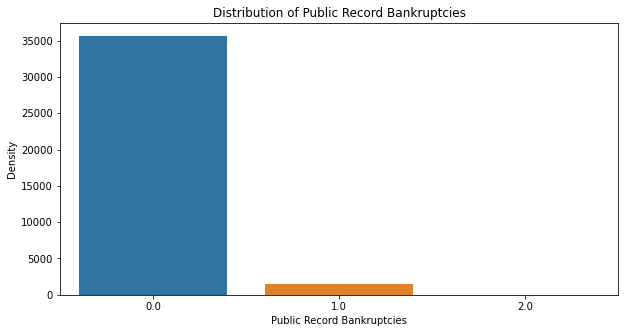

In [77]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.countplot(loan_data.pub_rec_bankruptcies)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

Majority of the borrowers have no record of Public Recorded Bankruptcy.

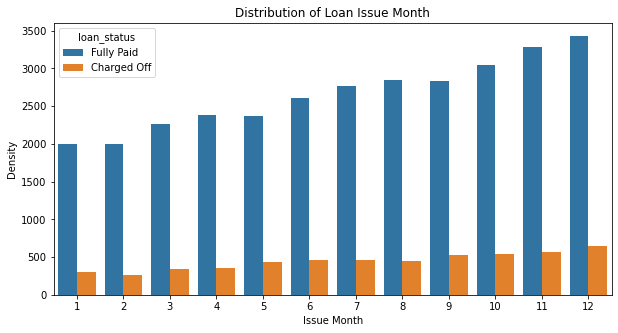

In [78]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(loan_data.issue_month,hue=loan_data.loan_status)
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

Majority of the loans are given in last quarter of the year.

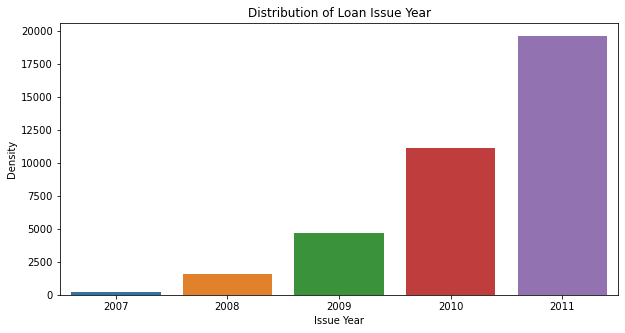

In [79]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(loan_data.issue_year)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis

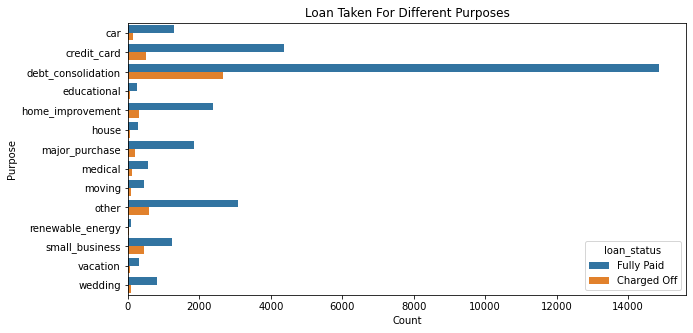

In [80]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()


Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

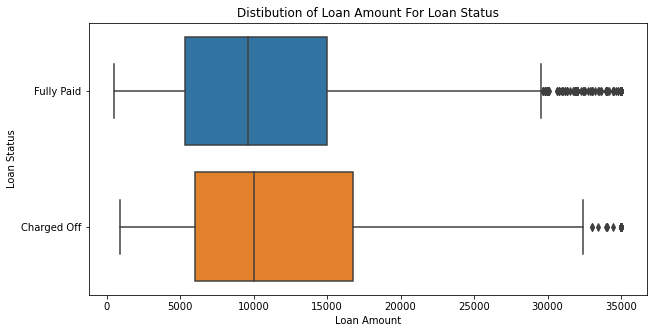

In [81]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

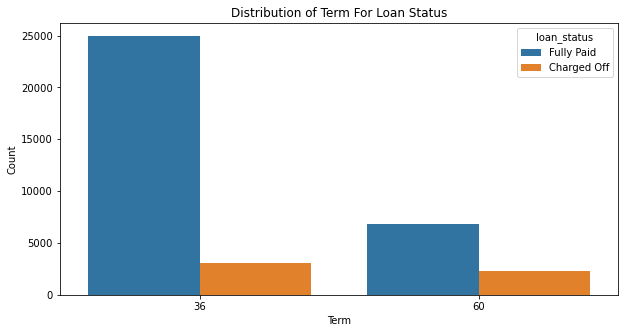

In [82]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

 The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

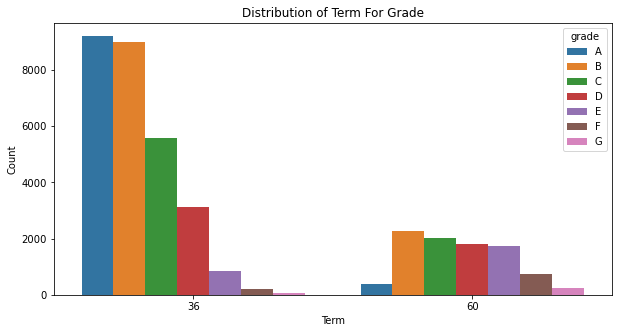

In [83]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

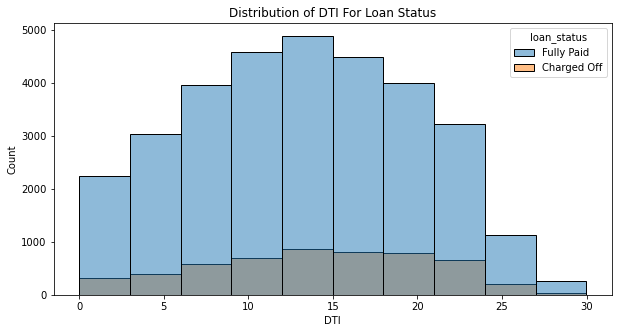

In [84]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

In [85]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

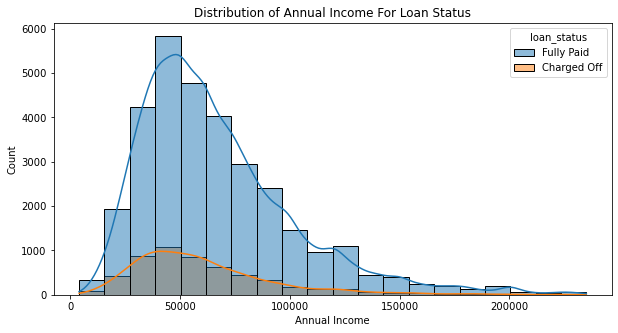

In [86]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()


Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

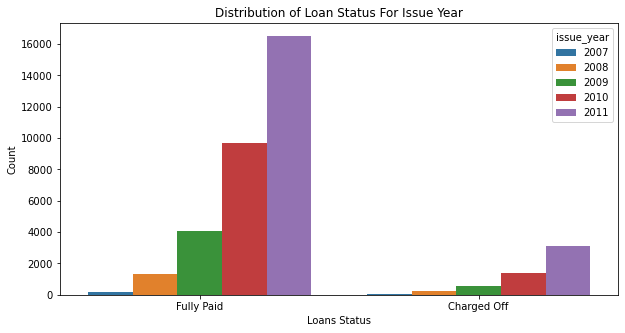

In [87]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

In [88]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

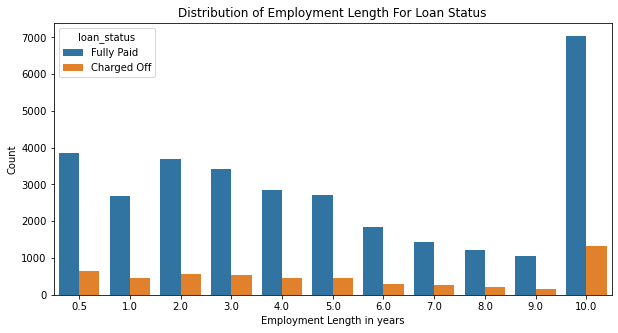

In [89]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

 The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis

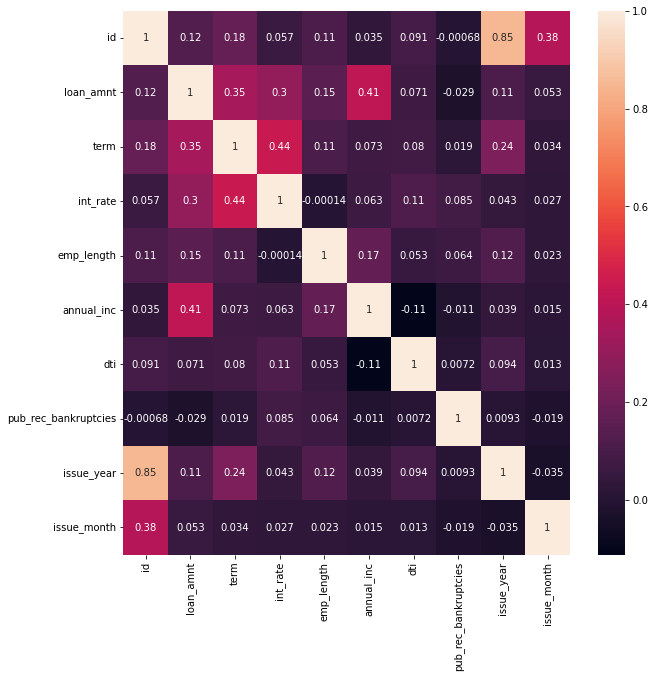

In [92]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()

# Insights

## Univariate Analysis

1. The number of defaulted loans is one-seventh of the fully paid loans.
2. Most loans have a term of 36 months rather than 60 months.
3. Interest rates are densely clustered around 5-10% and 10-15%
4. A significant portion of loans are graded 'A' and 'B', indicating that most loans are of high quality.
5. The majority of borrowers have over 10 years of work experience.
6. A large proportion of loans are taken for debt consolidation, followed by credit card purposes.
7. Most borrowers are from major urban areas such as California, New York, Texas, and Florida.
8. The majority of loans are issued in the last quarter of the year.
9. The number of approved loans has been increasing exponentially over time, suggesting a rising loan approval rate.

## Segmented Univariate Analysis

1. Debt consolidation is the most common loan purpose, with the highest number of both fully paid and defaulted loans.
2. Loans with a 60-month term are more likely to default compared to those with a 36-month term, which have a higher likelihood of being fully paid.
3. Loans with a 36-month term are predominantly of grade A and B, while those with a 60-month term mostly fall into grades B, C, and D.
4. Loan status varies with the DTI ratio; loans with a DTI ratio of 10-15 have a higher number of defaults, but a higher DTI ratio generally increases the likelihood of default.
5. Borrowers with an annual income of less than $50,000 are more prone to default, whereas those with higher incomes are less likely to default.
6. The amount of defaulted loans increases with the interest rate, but shows a decline after an interest rate of 17.5%.

## Bivariate Analysis

The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

# Conclusion:

1. Here are the major driving factors that can be used to predict the likelihood of defaulting and help avoid credit loss::

    * Annual income
    * DTI
    * Grades
    * Pub_rec_bankruptcies
    * Burrowers having annual income in the range 50000-100000.
    * Burrowers not from large urban cities like california, new york, texas, florida etc.
    * Burrowers with very high Debt to Income value.
    * Burrowers with working experience 10+ years.